<a href="https://colab.research.google.com/github/idanshabo/computational_learning/blob/main/PS1_Part3_Autograd_2024_ID_318632312.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch - Autograd (is what we need.)

Advanced Learning 2024





For SUBMISSION:  
  
Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 318632312
~~~

~~~
STUDENT GIT LINK: https://github.com/idanshabo/computational_learning.git
~~~

In Addition, don't forget to add your ID to the files:  
`PS1_Part3_Autograd_2024_ID_[318632312].html`  



This part of the problem-set is divided into 2 sections: (a) a short introduction to PyTorch autograd, and (b) some practice questions.      
The practice questions cover calculating the gradients and updating the weights of a statistical model (linear regression), with and without PyTorch autograd.

##  A Short Intro to PyTorch Autograd

In PyTorch, autograd, short for automatic differentiation, is a core functionality that empowers you to efficiently calculate gradients during deep learning model training. It acts as a computational engine that automatically tracks the operations performed on your tensors and calculates the gradients of any loss function with respect to the model's learnable parameters.

**Why is Autograd Important?**

* Gradient Calculation: Deep learning relies heavily on gradient-based optimization algorithms like stochastic gradient descent (SGD). These algorithms adjust the weights and biases (learnable parameters) of your model based on the gradients of the loss function. Autograd automates this process, saving you from manually calculating complex derivatives.
* Efficient Backpropagation: Backpropagation is the algorithm at the heart of training deep neural networks. It propagates the error (loss) backward through the network, allowing the model to adjust its parameters in the direction that minimizes the loss. Autograd streamlines this process, making training more efficient.

**How Does Autograd Work?**

* Tracking Operations: When you enable autograd mode (with `torch.autograd.record_grad()`), PyTorch creates a computational graph in the background. This graph tracks all the operations performed on your tensors

* Backward Pass: Once you calculate a loss function (which typically depends on the output of your model), you can call the `backward()` method on the loss tensor. This triggers the backward pass through the computational graph.

* Gradient Calculation: As the backward pass traverses the graph, autograd computes the gradients of the loss function with respect to each learnable parameter in the network. These gradients indicate how much a specific parameter contributed to the overall loss.

* Parameter Update: By utilizing these gradients, optimization algorithms like SGD update the model's learnable parameters in a direction that minimizes the loss function. This iterative process continues until the model converges (achieves a desired level of performance).

**Key Points about Autograd:**

* Automatic
* Only for Learnable Parameters: Autograd tracks gradients only for tensors that have `requires_grad=True`.
* Dynamic vs. Static Graphs (Optional): PyTorch offers both dynamic computational graphs (eager execution) and static graphs (graph mode) for model development.



In [1]:
import time
import numpy as np
import pandas as pd
import torch
import math
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)
print(f"Using {device}!")

Using cuda!


##  0. Loading data and defining our model and loss

Load the California Housing Market dataset into a panda's DataFrame.  
In addition, scale the data (why?).

In [3]:
# Import the dataset.
cali_train_path = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
train_df = pd.read_csv(filepath_or_buffer=cali_train_path).drop(['longitude','latitude'],axis=1)
train_df_norm=(train_df-train_df.mean(axis=0))/train_df.std(axis=0) # column-wise operators
# Scale the labels:
print(f"Dataset dimension: {train_df_norm.shape}")
train_df_norm.head()

Dataset dimension: (17000, 7)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506,-1.210522
1,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451,-1.096713
2,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071,-1.048430
3,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590,-1.154480
4,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424,-1.222593


We define a linear model to fit the scaled median house value to our data:  

**Our model :**.    

 $$\text{median_house_value}_i=y_i = \beta_0+	\beta_1\text{housing_median_age}_i+ 	\beta_2\text{total_rooms}_i+ 	\beta_3\text{total_bedrooms}_i+ 	\beta_4\text{population}_i+ 	\beta_5\text{households}_i+ 	\beta_6\text{median_income}_i 	$$

**Our loss :**  
$$
\hat{L}_i(y_i,\hat{y}_i) = MSE(\text{y}_i,\hat{\text{y}}_i)
$$


## 1.  Manually Calculating the Gradients and Updating the Weights



Here we take a step back, and implement forward and backward propogation manually (so we can fully appreciate the autograd later...).

First, create numpy arrays for our data (X) and target (Y):

In [4]:
X = train_df_norm.drop(['median_house_value'],axis=1).to_numpy()
X =  np.c_[  np.ones(X.shape[0]), X ] # adding a column of "1"s for intercept
Y = train_df_norm['median_house_value']

print(f"X dimension: {X.shape}")
print(f"Y dimension: {Y.shape}")

X dimension: (17000, 7)
Y dimension: (17000,)


### 1.1 Calculating the weights analytically (15pts)
Apply linear algebra operations to `X` and `Y` to analytically solve the linear regression problem (solve for `W`).   
Please use only numpy. Round the weights to 3 decimal places.  

In [5]:
#### SOLUTION REQUIRED ####
t1 = time.time()

# Prepare the data (X) and target (Y)
X = train_df_norm.drop(['median_house_value'], axis=1).to_numpy()
X = np.c_[np.ones(X.shape[0]), X]  # Adding the intercept term (a column of ones)
Y = train_df_norm['median_house_value'].to_numpy()

# Apply the Normal Equation to compute the weights
X_transpose = X.T
weights = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y

# Round the weights to 3 decimal places
weights_rounded = weights.round(3)
print(f"Total process time: {round(time.time() - t1,3)}")
print(f"The estimated weights using the analytic solution:\n {weights_rounded.round(3)}")

Total process time: 0.013
The estimated weights using the analytic solution:
 [ 0.     0.204 -0.375  0.362 -0.347  0.422  0.79 ]


Visualizing the errors:

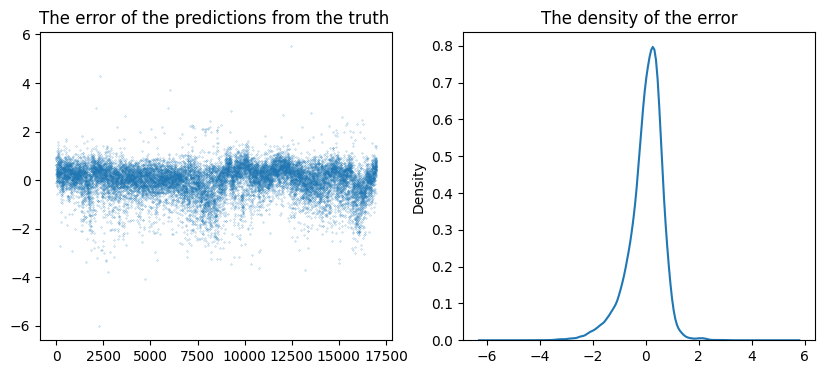

In [ ]:
# Plot the errors and density (sanity check):
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
error = (np.matmul( X, weights_rounded)-Y)
ax1.scatter(range(Y.shape[0]), error ,s=0.05,alpha=0.7)
ax1.set_title("The error of the predictions from the truth ")
sns.kdeplot(error,ax=ax2)
ax2.set_title("The density of the error")
fig.show()

### 1.2 Calculating the weights using numpy and gradient descent (30pts)

Now you are ready to implement an algorithm that iteratively calculates the weights using numpy and gradient descent.

Please fill in your code in the `### YOUR CODE HERE` sections in the code block below.   
Please don't change the other parts of the code (unless specified).  

An epoch in machine learning means one complete pass of the training dataset through the algorithm.   

While developing your code, you may reduce the number of epochs.   
However, for final output please use the pre-defined epochs number.      





In [6]:
t2 = time.time()

# Randomly initialize weights using numpy
b0 = np.random.randn()
b1 = np.random.randn()
b2 = np.random.randn()
b3 = np.random.randn()
b4 = np.random.randn()
b5 = np.random.randn()
b6 = np.random.randn()

# Set learning rate (this can be a little fiddly, requires some tunning)
# Tip: start with a very small steps...

learning_rate = 0.01

# Set number of epochs:
epochs = int(5e3)

# Loop through epochs, and apply gradient descent to update the weights:
for t in range(epochs):
    # Forward pass: compute predicted y
    # y_pred = b0x0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + b6x6
    Y_pred = b0 + b1 * X[:, 1] + b2 * X[:, 2] + b3 * X[:, 3] + b4 * X[:, 4] + b5 * X[:, 5] + b6 * X[:, 6]

    # Compute and print loss
    loss = np.mean((Y_pred - Y) ** 2)
    if t % 1000 == 0:
        print(f"Epoch:{t}, loss:{loss}")

    # Backprop to compute gradients of betas with respect to loss
    grad_y_pred = 2 * (Y_pred - Y)
    grad_b0 = np.mean(grad_y_pred)
    grad_b1 = np.mean(grad_y_pred * X[:, 1])
    grad_b2 = np.mean(grad_y_pred * X[:, 2])
    grad_b3 = np.mean(grad_y_pred * X[:, 3])
    grad_b4 = np.mean(grad_y_pred * X[:, 4])
    grad_b5 = np.mean(grad_y_pred * X[:, 5])
    grad_b6 = np.mean(grad_y_pred * X[:, 6])

    # Update weights
    b0 -= learning_rate * grad_b0
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2
    b3 -= learning_rate * grad_b3
    b4 -= learning_rate * grad_b4
    b5 -= learning_rate * grad_b5
    b6 -= learning_rate * grad_b6

print(f"Result: y_hat = {b0} x0 + {b1} x1 + {b2} x2 + {b3} x3\n + {b4} x4 + {b5} x5 + {b6} x6 \n")
print(f"Total process time: {round(time.time() - t2,3)}")

weights_gd_rounded = np.array([b0,b1,b2,b3,b4,b5,b6])
print(f"The estimated weights using the gradient descent solution:\n {weights_gd_rounded.round(3)}")

Epoch:0, loss:9.238691507592984
Epoch:1000, loss:0.43801334969278477
Epoch:2000, loss:0.4338123566852572
Epoch:3000, loss:0.43151602073534034
Epoch:4000, loss:0.43023729512803677
Result: y_hat = 3.6106994279891584e-16 x0 + 0.20657540583815973 x1 + -0.4114429519062289 x2 + 0.5361102281355901 x3
 + -0.31410714154071373 x4 + 0.2528178005616241 x5 + 0.8014729550420256 x6 

Total process time: 2.114
The estimated weights using the gradient descent solution:
 [ 0.     0.207 -0.411  0.536 -0.314  0.253  0.801]


### 1.3 Calculating the weights using PyTorch Tensors and gradient descent (25pts)

Here you are asked to implement the same manual gradient algorithm as above.  
However, this time please use PyTorch tensors and operators (instead of numpy).  

In [10]:
#### SOLUTION REQUIRED ####

# Creating data and target tensors:
tX = torch.tensor(X)
tY = torch.tensor(Y)

t3 = time.time()

# Randomly initialize weights using PyTorch
tb0 = torch.randn(1, requires_grad=True)
tb1 = torch.randn(1, requires_grad=True)
tb2 = torch.randn(1, requires_grad=True)
tb3 = torch.randn(1, requires_grad=True)
tb4 = torch.randn(1, requires_grad=True)
tb5 = torch.randn(1, requires_grad=True)
tb6 = torch.randn(1, requires_grad=True)

# Set learning rate
learning_rate = 0.01

# Set number of epochs:
epochs = int(5e3)

# Loop through epochs, and apply gradient descent to update the weights:
for t in range(epochs):
    # Forward pass: compute predicted y
    # y_pred = b0x0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + b6x6
    tY_pred = tb0 + tb1 * tX[:, 0] + tb2 * tX[:, 1] + tb3 * tX[:, 2] + tb4 * tX[:, 3] + tb5 * tX[:, 4] + tb6 * tX[:, 5]
    # Compute and print loss
    loss = torch.mean((tY_pred - tY) ** 2)
    if t % 1000 == 0:
        print(f"epoch:{t}, loss:{loss}")

    # Backprop to compute gradients of betas with respect to loss
    grad_y_pred = 2 * (tY_pred - tY)
    # print(grad_y_pred.sum())
    grad_b0 = grad_y_pred.mean()
    grad_b1 = (grad_y_pred * tX[:, 0]).mean()
    grad_b2 = (grad_y_pred * tX[:, 1]).mean()
    grad_b3 = (grad_y_pred * tX[:, 2]).mean()
    grad_b4 = (grad_y_pred * tX[:, 3]).mean()
    grad_b5 = (grad_y_pred * tX[:, 4]).mean()
    grad_b6 = (grad_y_pred * tX[:, 5]).mean()

    # Update weights
    tb0 = tb0 - learning_rate * grad_b0
    tb1 = tb1 - learning_rate * grad_b1
    tb2 = tb2 - learning_rate * grad_b2
    tb3 = tb3 - learning_rate * grad_b3
    tb4 = tb4 - learning_rate * grad_b4
    tb5 = tb5 - learning_rate * grad_b5
    tb6 = tb6 - learning_rate * grad_b6

print(f"Result: y_hat = {tb0} x0 + {tb1} x1 + {tb2} x2 + {tb3} x3\n + {tb4} x4 + {tb5} x5 + {tb6} x6 \n")
print(f"Total process time: {round(time.time() - t3,3)}")

weights_gd_tensors_rounded = np.array([tb0.item(),tb1.item(),tb2.item(),tb3.item(),
                                       tb4.item(),tb5.item(),tb6.item()])
print(f"The estimated weights using the gradient descent on tensors:\n {weights_gd_tensors_rounded.round(3)}")

epoch:0, loss:12.424009380595967
epoch:1000, loss:0.890322901685825
epoch:2000, loss:0.8647305746933652
epoch:3000, loss:0.8534466560317345
epoch:4000, loss:0.8475484938491094
Result: y_hat = tensor([-0.2588], device='cuda:0', grad_fn=<SubBackward0>) x0 + tensor([0.2588], device='cuda:0', grad_fn=<SubBackward0>) x1 + tensor([0.1790], device='cuda:0', grad_fn=<SubBackward0>) x2 + tensor([0.8279], device='cuda:0', grad_fn=<SubBackward0>) x3
 + tensor([-0.7453], device='cuda:0', grad_fn=<SubBackward0>) x4 + tensor([-0.5896], device='cuda:0', grad_fn=<SubBackward0>) x5 + tensor([0.6163], device='cuda:0', grad_fn=<SubBackward0>) x6 

Total process time: 5.742
The estimated weights using the gradient descent on tensors:
 [-0.259  0.259  0.179  0.828 -0.745 -0.59   0.616]


### 1.4 Calculating the weights using PyTorch Autograd! (15pts)

Lastly, you can finally make a full transition to PyTorch autograd framework.   
Please replace your manual gradient calculations with PyTorch's automatic gradient tracking.   
In addition, instead of declaring the parameters separately, we will use one tensor to represent all of the model's parameters.  

In [8]:
t4 = time.time()

# Randomly initialize weights using PyTorch
# we can use 1x7 tensor for all the weights. Make sure `requires_grad = True`.
tb = torch.randn(7, requires_grad=True, device=device)
tX = tX.to(torch.float32)

# Set learning rate
learning_rate = 1e-5
# Set number of epochs:
epochs = int(5e3)

# Loop through epochs, and apply gradient descent to update the weights:
for t in range(epochs):

    # Forward pass: compute predicted y
    #tY_pred = torch.matmul(tX, tb)
    tY_pred = torch.matmul(tX, tb)

    # Compute and print loss
    loss = ((tY_pred - tY) ** 2).mean()
    if t % 1000 == 0:
        print(f"epoch:{t}, loss:{loss.item()}")

    # Backprop to compute gradients of betas with respect to loss
    loss.backward()

    with torch.no_grad():
        # Update weights
        tb -= learning_rate * tb.grad
        tb.grad = None # manually clear gradient after update


print(f"Result: betas = {tb} \n")
print(f"Total process time: {round(time.time() - t4,3)}")

weights_autograd_rounded = tb.cpu().detach().numpy()
print(f"The estimated weights using the pytorch autograd:\n {weights_autograd_rounded.round(3)}")

epoch:0, loss:4.542358091896304
epoch:1000, loss:4.040608091201772
epoch:2000, loss:3.6081659633125027
epoch:3000, loss:3.2351686750894713
epoch:4000, loss:2.9131662460759484
Result: betas = tensor([-0.1488,  0.8490, -0.5222, -0.8030,  0.2005,  0.2721,  0.2578],
       device='cuda:0', requires_grad=True) 

Total process time: 3.474
The estimated weights using the pytorch autograd:
 [-0.149  0.849 -0.522 -0.803  0.2    0.272  0.258]


### 1.5 Conclusion (15pts)

1. Which method is the most accurate in finding the "true" weights? Why? Is it always applicabale? Hint - you should think about it from a statistical theory point of view.
2. Why did we scale the data ?  (answer with respect to the model/algorithm)
3. Do you think our model specification produced good results?  Why or why not? Justify your answer.
4. What can you say about the total process times between methods?
5. Can you suggest some improvements to the model definition?
6. Can you suggest some improvements to the solution algorithm?

YOUR ANSWERS HERE

1. The analytic solution (first method) is the most accurate in finding the "true" weights because it directly solves the normal equations (X'X)^(-1)X'y to minimize the sum of squared residuals globally. This provides the exact solution in one step, while gradient descent methods may converge to local minima and require iterative optimization. However, the analytic solution is not always applicable because:

  - It requires computing the inverse of X'X which is computationally expensive for large datasets
  - It requires holding the entire design matrix in memory
  - It doesn't work for non-linear models

  among the gd methods, the numpy solution got the best results. unfortunatly, this method is also not always applicable because it is not efficient enough in computation - in large datasets this calculation will just take too long.
2. The data was scaled (normalized) for several important reasons:
  - To prevent numerical instability during optimization
  - To put all features on the same scale so gradient descent converges more efficiently
  - To avoid features with larger magnitudes dominating the optimization

3. The model produced reasonabl results, though there was room for improvement.

  The final loss values converged to relatively small numbers, the loss decreased between different iterations and the weights found by different methods were generally consistent in direction/magnitude. Maybe tuning the hyperparameters, for an example - different starting weights could lead to convergence to a global maximum rather then local maximum which would have improved the results.

4. Regarding process times:

  - Analytic solution was fastest at ~0.013s
  - NumPy gradient descent took ~2.1s
  - PyTorch tensor implementation took ~5.7s
  - PyTorch autograd took ~3.5s

  The analytic solution is much faster since it doesn't require iterations. The PyTorch implementations have some overhead but provide flexibility for more complex models. probably the more complex the model and computatio will be, we will see an advantage for using the autograd method over the numpy one, even though currently we can't see it in the data.
5. Potential model improvements:

  - Add non-linear feature transformations
  - Try regularization to prevent overfitting
  - Use cross-validation to evaluate generalization
  - Test different model architectures (e.g. polynomial regression)
6. Algorithm improvements:

  - Implement mini-batch gradient descent for better efficiency and faster convergence
  - Try different initialization strategies for weights

PART 2: Coming soon...